In [155]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from scipy.special import expit, logit

import random

In [156]:
# Generate random data that is normally distributed

# Create a list of random numbers between 1 and 50
X = [x for x in range(1,51)]

# Convert to NumPy array
X = np.array(X)

# Increase dimensionality of X by 1 for arithmetic purpose
X = X[:, np.newaxis]

In [157]:
# Instantiate a method of the Scaler class.

# The StandardScaler will standardize the  normally distributed data
scaler = StandardScaler()

In [158]:
# Standardize the data (transform) and remember (fit) the constants
# to later undo the transformation
X = scaler.fit_transform(X)

In [159]:
# All the x's that are greater than mean will be classed 1 and 0 if less than mean
# Note: the parenthesis are used to emphasize order-of-operations
Y = (X > X.mean()).astype(int)

In [160]:
# Convert to DataFrame
data_dict = {
    'feature': X.ravel(),
    'label': Y.ravel() 
}

data_df = pd.DataFrame(data_dict)

In [161]:
data_df.tail()

,feature,label
45,1.420566,1
46,1.489862,1
47,1.559158,1
48,1.628453,1
49,1.697749,1


In [162]:
# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y,                
    test_size=0.4,    # 40% of data for test, 60% for train
    shuffle=True,      # Randomize the data
    random_state=155
)

In [163]:
X.max(), X.min()

(1.697749375254331, -1.697749375254331)

In [164]:
# Ravel the data to sort
X_test = np.sort(X_test.ravel())

# Again increase the dimension for plot
X_test = X_test[:, np.newaxis]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


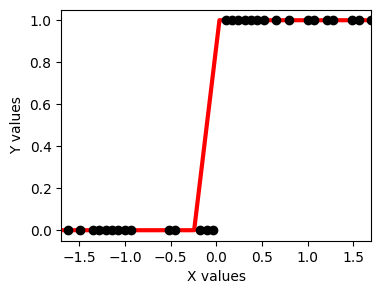

In [165]:
# Model the data
model = LogisticRegression()
model.fit(X_train,Y_train)


# Plot the result
plt.figure(1, figsize=(4,3))

# Setting the plot for classification plot
plt.clf()


# Plot the data
plt.scatter(X_train, Y_train, color="black", zorder=5)


# Plot the model with test data set
Y_hat = model.predict(X_test)
plt.plot(X_test, Y_hat, color='red', linewidth=3)

# Label the axes
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xlim(X.min(), X.max())
plt.show()


In [166]:
# Metrics for Logistic Regression Model
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(Y_test, Y_hat)
recall = recall_score(Y_test, Y_hat)
accuracy = accuracy_score(Y_test, Y_hat)

print("Precision", precision)
print("Recall", recall)
print("Accuracy", accuracy)

Precision 0.4444444444444444
Recall 0.4444444444444444
Accuracy 0.5
